In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import warnings
warnings.simplefilter("ignore")

# Data Cleaning

In [18]:
df = pd.read_csv('/kaggle/input/mental-health-of-remote-workers/mental_health_remote_workers.csv')
#printing first 5 rows
df.head()

,Employee_ID,Name,Age,Gender,Country,Job_Role,Experience_Years,Work_Mode,Hours_Worked_Per_Week,Productivity_Score,Mental_Health_Status,Burnout_Score,Sleep_Hours_Per_Day,Exercise_Frequency,Work_Life_Balance_Rating,Has_Access_To_Therapist,Willing_To_Return_Onsite,Remote_Setup_Satisfaction,Internet_Issues_Frequency,Team_Communication_Effectiveness
0,1,User_1,28,Female,Canada,QA Engineer,5.4,Onsite,45.4,6.6,Poor,44,5.7,Rarely,7.5,True,False,9.9,Sometimes,7.7
1,2,User_2,41,Prefer not to say,Australia,DevOps Engineer,10.5,Remote,40.4,8.4,Good,58,5.1,Daily,8.6,False,True,2.5,Often,9.0
2,3,User_3,36,Male,Germany,UI/UX Designer,11.9,Hybrid,43.6,6.6,Good,78,6.1,Never,6.2,False,False,9.1,Often,7.7
3,4,User_4,32,Prefer not to say,Germany,Product Manager,15.6,Hybrid,41.3,9.0,Moderate,71,5.4,Rarely,8.5,True,True,6.1,Sometimes,8.4
4,5,User_5,29,Male,UK,DevOps Engineer,1.8,Hybrid,42.5,6.9,Poor,69,7.1,Never,6.0,True,True,9.3,Never,4.7


In [4]:
#shape of data
df.shape

#cheking null values
df.isnull().sum()

Employee_ID                         0
Name                                0
Age                                 0
Gender                              0
Country                             0
Job_Role                            0
Experience_Years                    0
Work_Mode                           0
Hours_Worked_Per_Week               0
Productivity_Score                  0
Mental_Health_Status                0
Burnout_Score                       0
Sleep_Hours_Per_Day                 0
Exercise_Frequency                  0
Work_Life_Balance_Rating            0
Has_Access_To_Therapist             0
Willing_To_Return_Onsite            0
Remote_Setup_Satisfaction           0
Internet_Issues_Frequency           0
Team_Communication_Effectiveness    0
dtype: int64

In [7]:
#Droping columns
df.drop(['Employee_ID', 'Name'] , axis=1, inplace= True)

In [10]:
# Checking Unique Valuse
df.nunique()

Age                                 27
Gender                               4
Country                              7
Job_Role                             6
Experience_Years                    83
Work_Mode                            3
Hours_Worked_Per_Week               75
Productivity_Score                  54
Mental_Health_Status                 3
Burnout_Score                       59
Sleep_Hours_Per_Day                 40
Exercise_Frequency                   4
Work_Life_Balance_Rating            59
Has_Access_To_Therapist              2
Willing_To_Return_Onsite             2
Remote_Setup_Satisfaction           58
Internet_Issues_Frequency            3
Team_Communication_Effectiveness    56
dtype: int64

# Data Visualization

# Gender Distribution

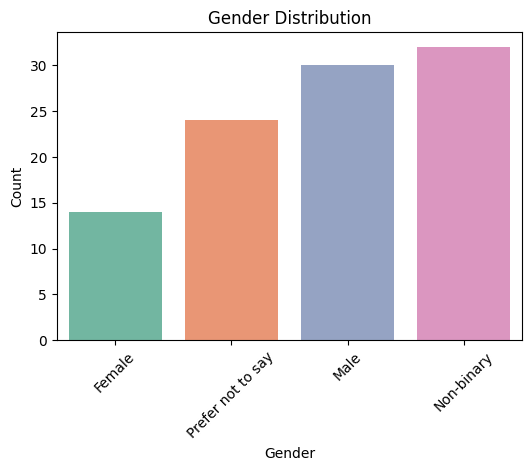

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data= df ,x= "Gender", palette='Set2')
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Mental Health Status Distribution

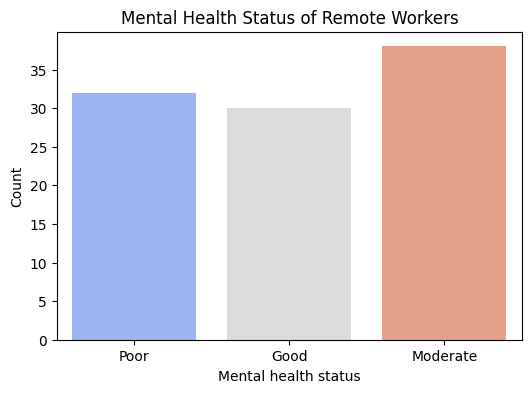

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x= "Mental_Health_Status", palette='coolwarm')
plt.title("Mental Health Status of Remote Workers")
plt.xlabel("Mental health status")
plt.ylabel("Count")
plt.show()

# Work Mode vs. Mental Health Status

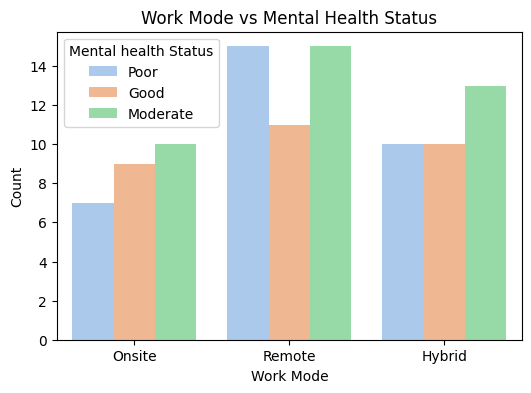

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x= 'Work_Mode', hue = 'Mental_Health_Status', palette = 'pastel')
plt.title('Work Mode vs Mental Health Status')
plt.xlabel('Work Mode')
plt.ylabel('Count')
plt.legend(title = 'Mental health Status')
plt.show()

# Burnout Score vs. Sleep Hours Per Day

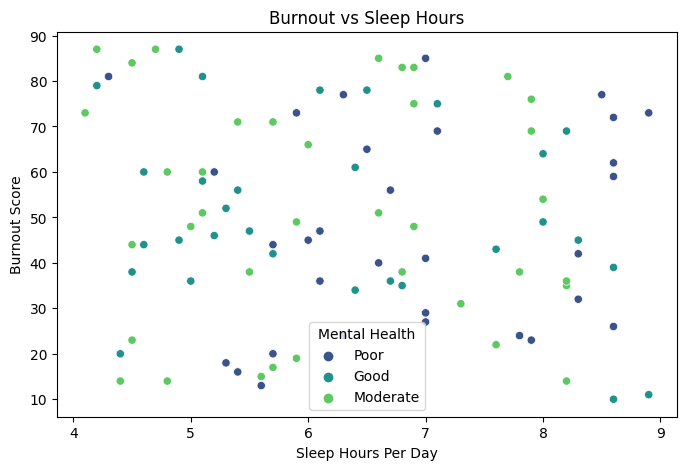

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sleep_Hours_Per_Day', y='Burnout_Score', hue='Mental_Health_Status', palette='viridis')
plt.title("Burnout vs Sleep Hours")
plt.xlabel("Sleep Hours Per Day")
plt.ylabel("Burnout Score")
plt.legend(title="Mental Health")
plt.show()

# Work-Life Balance vs. Productivity

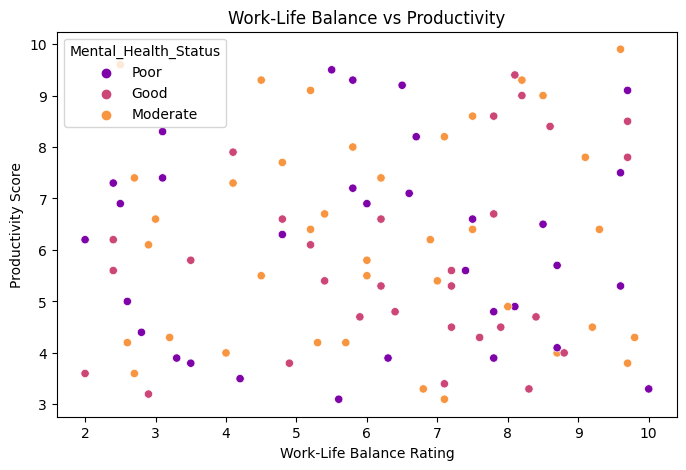

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Work_Life_Balance_Rating', y='Productivity_Score', hue='Mental_Health_Status', palette='plasma')
plt.title("Work-Life Balance vs Productivity")
plt.xlabel("Work-Life Balance Rating")
plt.ylabel("Productivity Score")
plt.show()

# Correlation Heatmap

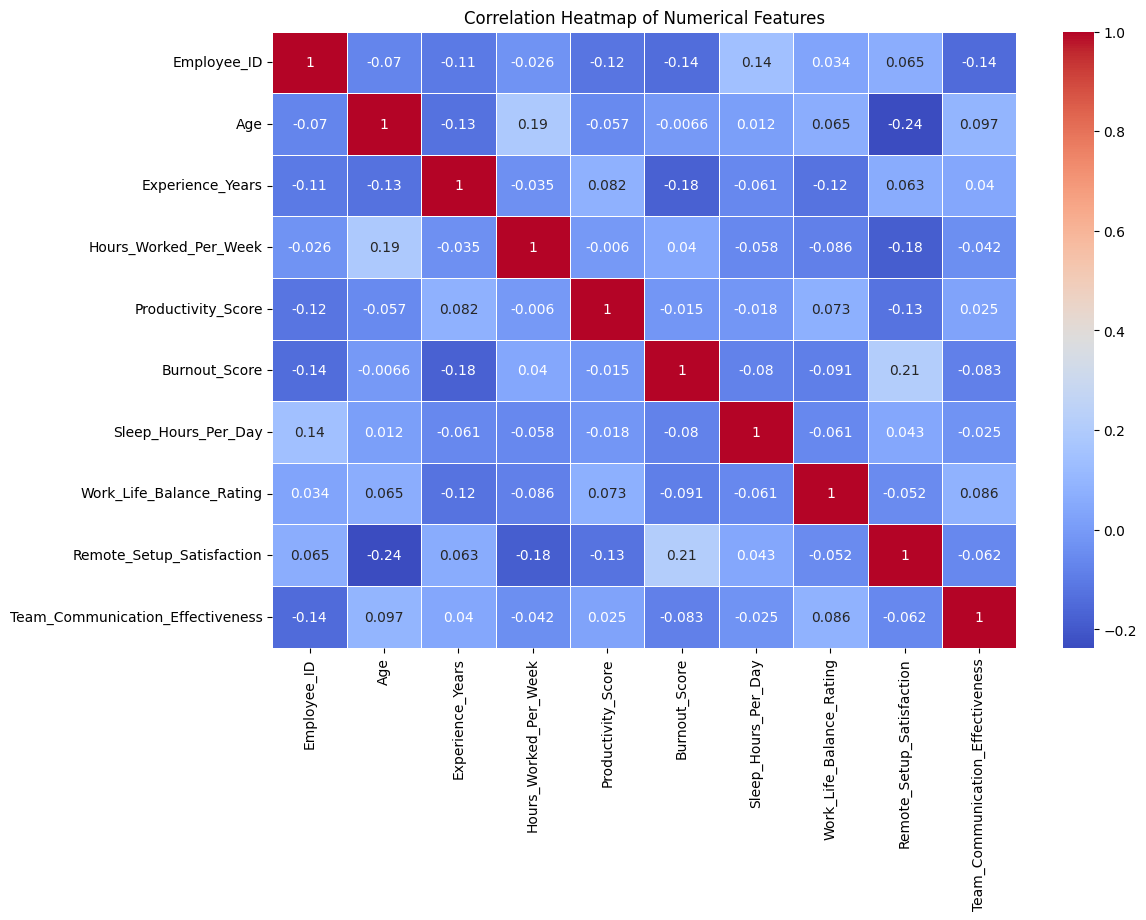

In [28]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Machine Learning Modeling

In [30]:
# Copy the DataFrame to avoid changing original
df_model = df.copy()

# Target
y = df_model['Mental_Health_Status']

# Drop target and categorical fields that are not needed or too sparse
X = df_model.drop(['Mental_Health_Status', 'Country', 'Gender', 'Job_Role'], axis=1)

# One-hot encode categorical fields (if any)
X = pd.get_dummies(X, drop_first=True)


In [36]:
df['Mental_Health_Binary'] = df['Mental_Health_Status'].apply(lambda x: 1 if x == 'Good' else 0)

In [39]:
selected_features = [
    'Sleep_Hours_Per_Day',
    'Burnout_Score',
    'Exercise_Frequency',
    'Work_Life_Balance_Rating',
    'Remote_Setup_Satisfaction'
]

X = df[selected_features]
y = df['Mental_Health_Binary']


In [40]:
X = df[selected_features]  # Choose best features only
y = df['Mental_Health_Binary']

Text(0.5, 1.0, 'Burnout Score by Mental Health Status')

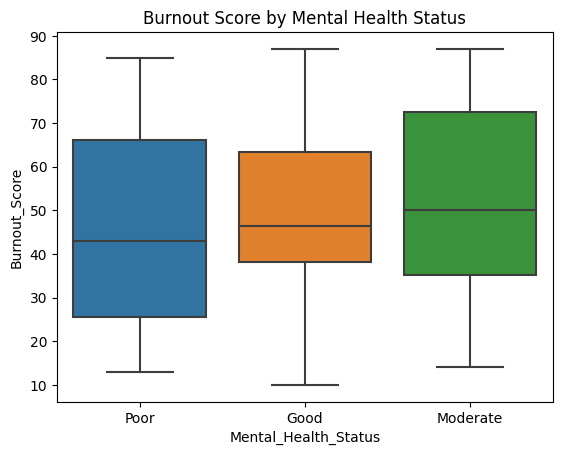

In [38]:
sns.boxplot(x='Mental_Health_Status', y='Burnout_Score', data=df)
plt.title("Burnout Score by Mental Health Status")


In [42]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.00      0.00      0.00         3

    accuracy                           0.50        20
   macro avg       0.38      0.29      0.33        20
weighted avg       0.65      0.50      0.57        20



In [45]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [56]:
from sklearn.utils import resample
import numpy as np

# Separate classes
X_train_0 = X_train_scaled[y_train == 0]
X_train_1 = X_train_scaled[y_train == 1]

y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# Upsample minority class (class 1) to match majority class size
X_train_1_upsampled, y_train_1_upsampled = resample(
    X_train_1,
    y_train_1,
    replace=True,
    n_samples=len(y_train_0),
    random_state=42
)

# Combine majority class with upsampled minority class
X_resampled = np.vstack((X_train_0, X_train_1_upsampled))
y_resampled = np.hstack((y_train_0, y_train_1_upsampled))


In [57]:
model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [60]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.00      0.00      0.00         3

    accuracy                           0.55        20
   macro avg       0.39      0.32      0.35        20
weighted avg       0.67      0.55      0.60        20



In [62]:
# Convert X_train_scaled (numpy array) into DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now safely concatenate
train_data = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)


In [64]:
# Separate majority and minority classes
majority_class = train_data[train_data['Mental_Health_Binary'] == 0]
minority_class = train_data[train_data['Mental_Health_Binary'] == 1]

# Upsample minority class
minority_upsampled = minority_class.sample(len(majority_class), replace=True, random_state=42)

# Combine into balanced training data
balanced_train_data = pd.concat([majority_class, minority_upsampled])

# Split back into features and target
X_train_bal = balanced_train_data.drop("Mental_Health_Binary", axis=1)
y_train_bal = balanced_train_data["Mental_Health_Binary"]


In [69]:
model.fit(X_train_bal, y_train_bal)
y_pred_bal = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.75      0.35      0.48        17
           1       0.08      0.33      0.13         3

    accuracy                           0.35        20
   macro avg       0.42      0.34      0.31        20
weighted avg       0.65      0.35      0.43        20



In [70]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)
y_pred_bal = model.predict(X_test_scaled)

In [67]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

# Confusion Matrix

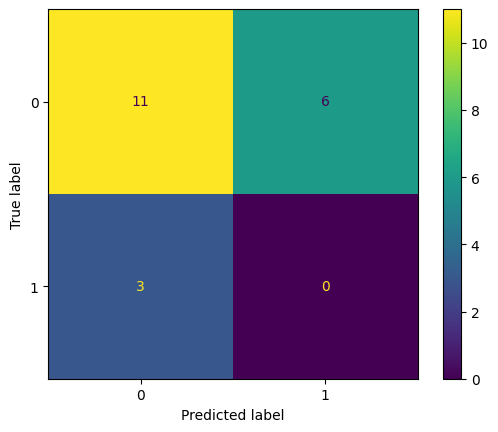

In [72]:

cm = confusion_matrix(y_test, y_pred_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# ROC Curve and AUC Score

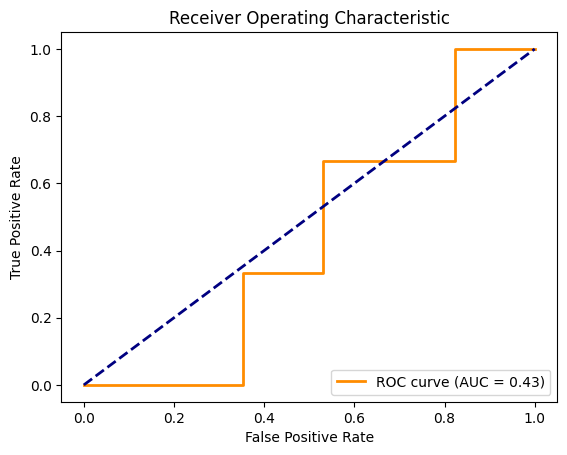

In [73]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()